In [14]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split #splits data for training and testing 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

In [15]:
file_path = 'Brain_Data_Organised'

In [16]:
name_class = os.listdir(file_path)
name_class

['Normal', 'Stroke']

In [17]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [18]:
filepaths[-6:-1]

['Brain_Data_Organised/Stroke/93 (1).jpg',
 'Brain_Data_Organised/Stroke/88 (12).jpg',
 'Brain_Data_Organised/Stroke/70 (46).jpg',
 'Brain_Data_Organised/Stroke/91 (13).jpg',
 'Brain_Data_Organised/Stroke/84 (24).jpg']

In [19]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',

In [20]:

filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,Brain_Data_Organised/Stroke/74 (9).jpg,Stroke
1,Brain_Data_Organised/Normal/52 (38).jpg,Normal
2,Brain_Data_Organised/Normal/55 (23).jpg,Normal
3,Brain_Data_Organised/Normal/55 (3).jpg,Normal
4,Brain_Data_Organised/Normal/52 (30).jpg,Normal


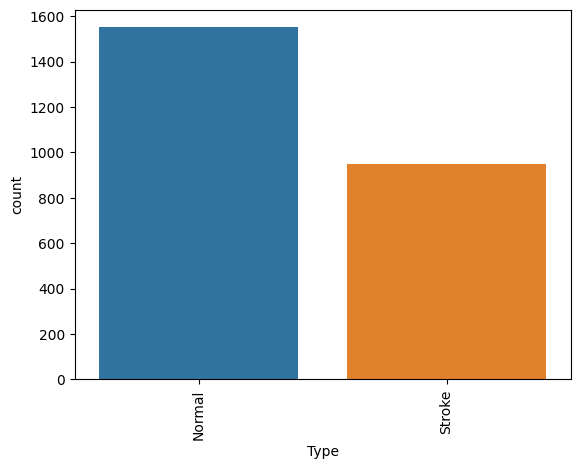

In [21]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [22]:
train, test = train_test_split(data, test_size=0.20, random_state=42)

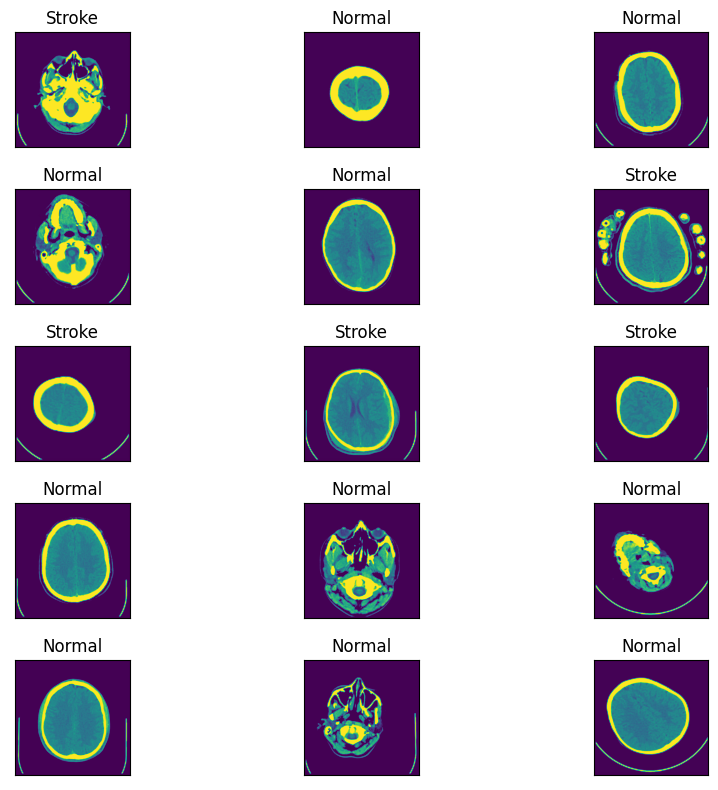

In [23]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [24]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [25]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 2000 validated image filenames belonging to 2 classes.
Found 501 validated image filenames belonging to 2 classes.
Found 501 validated image filenames belonging to 2 classes.


In [26]:
pretrained_model = ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [27]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [28]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [30]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=20
)

Epoch 1/20


2024-12-11 12:36:57.799193: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-12-11 12:37:01.375435: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20480000 exceeds 10% of free system memory.
2024-12-11 12:37:01.478730: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20480000 exceeds 10% of free system memory.
2024-12-11 12:37:01.496251: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22151168 exceeds 10% of free system memory.
2024-12-11 12:37:01.512291: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20480000 exceeds 10% of free system memory.
2024-12-11 12:37:01.527543: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20480000 exceeds 10% of

63/63 [==============================] - ETA: 0s - loss: 0.6783 - accuracy: 0.6360

2024-12-11 12:37:58.539470: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


63/63 [==============================] - 77s 1s/step - loss: 0.6783 - accuracy: 0.6360 - val_loss: 0.5639 - val_accuracy: 0.7226
Epoch 2/20
63/63 [==============================] - 97s 2s/step - loss: 0.5087 - accuracy: 0.7375 - val_loss: 0.5281 - val_accuracy: 0.7385
Epoch 3/20
63/63 [==============================] - 92s 1s/step - loss: 0.4392 - accuracy: 0.7870 - val_loss: 0.4443 - val_accuracy: 0.7864
Epoch 4/20
63/63 [==============================] - 80s 1s/step - loss: 0.3446 - accuracy: 0.8470 - val_loss: 0.4192 - val_accuracy: 0.7964
Epoch 5/20
63/63 [==============================] - 90s 1s/step - loss: 0.3351 - accuracy: 0.8520 - val_loss: 0.3946 - val_accuracy: 0.8224
Epoch 6/20
63/63 [==============================] - 103s 2s/step - loss: 0.2641 - accuracy: 0.8930 - val_loss: 0.4258 - val_accuracy: 0.8164
Epoch 7/20
63/63 [==============================] - 91s 1s/step - loss: 0.2208 - accuracy: 0.9125 - val_loss: 0.4408 - val_accuracy: 0.8244
Epoch 8/20
63/63 [============

In [32]:
model.save("Brain_stroke_detection.h5")  

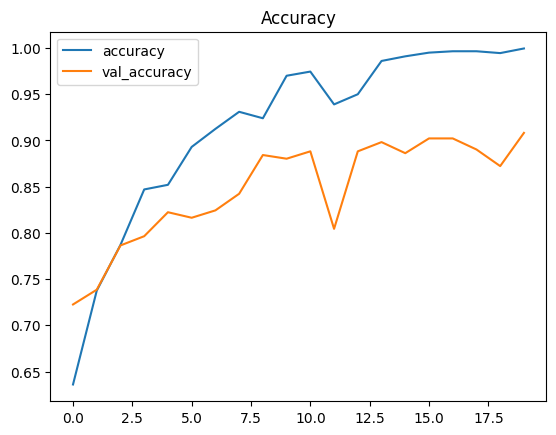

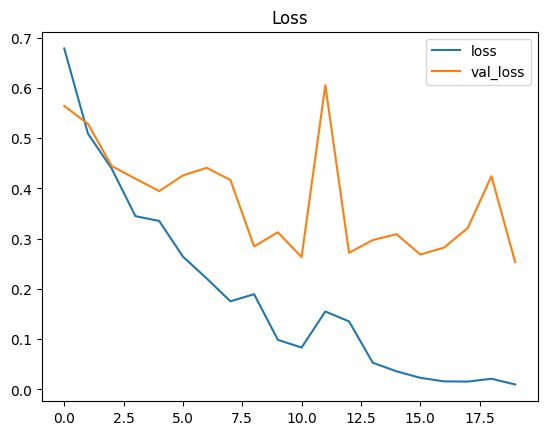

In [33]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [34]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

2024-12-11 13:29:04.526053: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


    Test Loss: 0.25309
Test Accuracy: 90.82%


In [35]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

2024-12-11 13:29:19.566885: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


16/16 [==============================] - 16s 858ms/step


In [36]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      Normal       0.91      0.95      0.93       314
      Stroke       0.91      0.84      0.87       187

    accuracy                           0.91       501
   macro avg       0.91      0.89      0.90       501
weighted avg       0.91      0.91      0.91       501



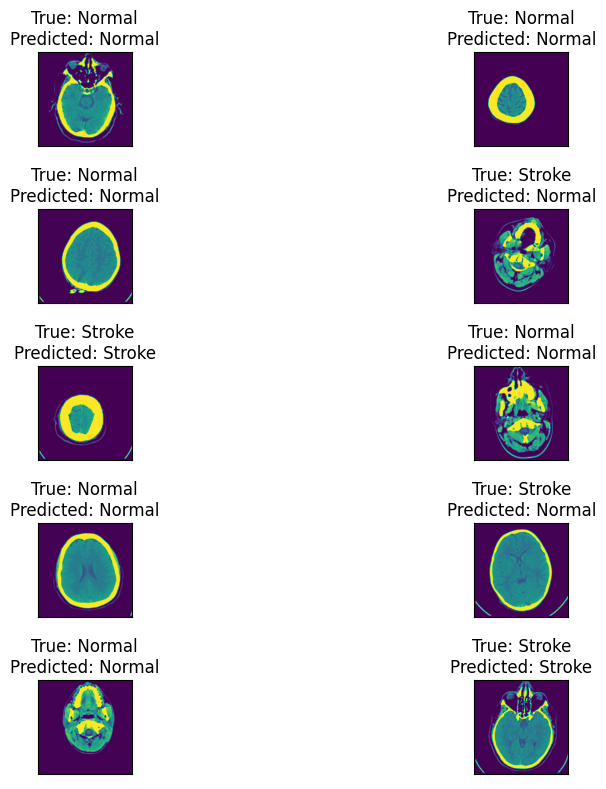

In [37]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [38]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = '58 (1).jpg'

img = image.load_img(img_path, target_size=(100,100))
x = image.img_to_array(img)

x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
result = model.predict(x)
print((result*100).astype('int'))


1/1 [==============================] - 1s 1s/step
[[ 0 99]]
